In [2]:
import submission_tools
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

### Load Data

In [10]:
features = submission_tools.read_all_features(
    '/scratch/utrerf/trigger-attack/trojai_submission/scratch/RHPP1CJR0B')
features.head()

,trigger,loss,test_loss,location,source_label,target_label,task,poisoned,model_name
0,incumbent heavyweight syndicated heavyweighton...,0.519836,1.165407,None,"[1, 2]","[3, 4]",ner,True,id-00000104
1,dependingwamingedwami firmlogist multi ho,0.587288,0.732307,None,"[1, 2]","[5, 6]",ner,True,id-00000104
2,event international athletics around 1997cerszoso,0.251362,0.279691,None,"[1, 2]","[7, 8]",ner,True,id-00000104
3,rescue medal translated 2016gillskar weighted ...,0.113711,0.251456,None,"[3, 4]","[1, 2]",ner,True,id-00000104
4,scorerfy sacked purchasedroots Guild 1997oki,0.214479,0.345195,None,"[3, 4]","[5, 6]",ner,True,id-00000104


In [12]:
mean_std = features.groupby(['location', 'source_label', 'target_label'], as_index=False).agg({'test_loss':['mean', 'std']})
columns = []
for i in mean_std.columns:
    result = i[0]
    if len(i[1]) > 0:
        result += f'_{i[1]}'
    columns.append(result)

mean_std.columns = columns

merged_df = pd.merge(features, mean_std, on=['location', 'source_label', 'target_label'], how='left')

merged_df['normalized_test_loss'] = (merged_df['test_loss'] - merged_df['test_loss_mean'])/merged_df['test_loss_std']
merged_df.head()


,trigger,loss,test_loss,location,source_label,target_label,task,poisoned,model_name,test_loss_mean,test_loss_std,normalized_test_loss
0,incumbent heavyweight syndicated heavyweighton...,0.519836,1.165407,None,"[1, 2]","[3, 4]",ner,True,id-00000104,1.345915,0.691053,-0.261207
1,dependingwamingedwami firmlogist multi ho,0.587288,0.732307,None,"[1, 2]","[5, 6]",ner,True,id-00000104,0.791371,0.337506,-0.175002
2,event international athletics around 1997cerszoso,0.251362,0.279691,None,"[1, 2]","[7, 8]",ner,True,id-00000104,1.343088,0.795737,-1.336368
3,rescue medal translated 2016gillskar weighted ...,0.113711,0.251456,None,"[3, 4]","[1, 2]",ner,True,id-00000104,0.621045,0.478081,-0.773066
4,scorerfy sacked purchasedroots Guild 1997oki,0.214479,0.345195,None,"[3, 4]","[5, 6]",ner,True,id-00000104,0.642767,0.436247,-0.682119


### Visualize Data

<ipython-input-15-3ee8e3898a40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_features['normalized_test_loss'] = min_features['normalized_test_loss'].astype(float)
<ipython-input-15-3ee8e3898a40>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_features['task'] = min_features['task'].str.upper()


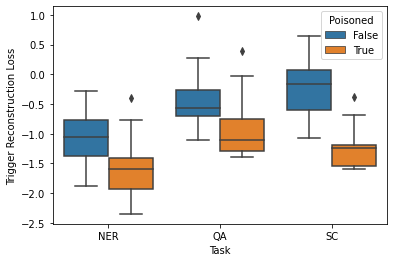

In [15]:
idx = merged_df.groupby(['model_name'])['normalized_test_loss'].transform(min) == merged_df['normalized_test_loss']

min_features = merged_df[idx]
min_features['normalized_test_loss'] = min_features['normalized_test_loss'].astype(float)
min_features['task'] = min_features['task'].str.upper()


sns.boxplot(data=min_features, x='task', y='normalized_test_loss', hue='poisoned')
# plt.ylim(-.05, 1.)
plt.legend(loc='upper right', title='Poisoned')
plt.ylabel('Trigger Reconstruction Loss')
plt.xlabel('Task')
plt.savefig('normalization_hurts.jpeg', dpi=2000)

<ipython-input-16-dfcdecd1b2ec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_features['test_loss'] = min_features['test_loss'].astype(float)
<ipython-input-16-dfcdecd1b2ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_features['task'] = min_features['task'].str.upper()


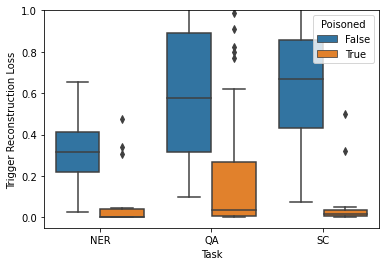

In [16]:
idx = merged_df.groupby(['model_name'])['test_loss'].transform(min) == merged_df['test_loss']

min_features = merged_df[idx]
min_features['test_loss'] = min_features['test_loss'].astype(float)
min_features['task'] = min_features['task'].str.upper()

sns.boxplot(data=min_features, x='task', y='test_loss', hue='poisoned')
plt.ylim(-.05, 1.)
plt.legend(loc='upper right', title='Poisoned')
plt.ylabel('Trigger Reconstruction Loss')
plt.xlabel('Task')
plt.savefig('round9_mar8.jpeg', dpi=2000)

<ipython-input-39-891c81060b81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_features['test_loss'] = min_features['test_loss'].astype(float)
<ipython-input-39-891c81060b81>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min_features['task'] = min_features['task'].str.upper()
<ipython-input-39-891c81060b81>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

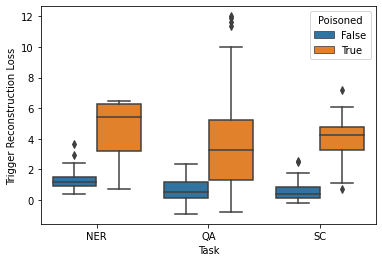

In [39]:
import numpy as np

idx = merged_df.groupby(['model_name'])['test_loss'].transform(min) == merged_df['test_loss']

min_features = merged_df[idx]
min_features['test_loss'] = min_features['test_loss'].astype(float)
min_features['task'] = min_features['task'].str.upper()
min_features['log_loss'] = -np.log(min_features['test_loss'])
ixs = min_features['log_loss'] > 12
min_features['log_loss'].loc[ixs] = 12

sns.boxplot(data=min_features, x='task', y='log_loss', hue='poisoned')
plt.legend(loc='upper right', title='Poisoned')
plt.ylabel('Trigger Reconstruction Loss')
plt.xlabel('Task')
plt.savefig('log_loss.jpeg', dpi=2000)

### Model

In [46]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
result = enc.fit_transform(min_features[['task']])
X = pd.DataFrame(data=result, columns=list(enc.categories_[0]))
X['loss'] = min_features['test_loss'].reset_index(drop=True)

y = min_features['poisoned'].reset_index(drop=True)
X.head()

,NER,QA,SC,loss
0,1.0,0.0,0.0,0.042003
1,0.0,1.0,0.0,0.005530
2,0.0,1.0,0.0,1.033355
3,0.0,0.0,1.0,0.999122
4,1.0,0.0,0.0,0.166810


In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
rsk = RepeatedStratifiedKFold(n_splits=5, n_repeats=20)
calibrated_clf = CalibratedClassifierCV(base_estimator=clf, cv=rsk)
calibrated_clf.fit(X, y)

# from joblib import dump, load
# dump(calibrated_clf, 'classifier.joblib') 

CalibratedClassifierCV(base_estimator=RandomForestClassifier(),
                       cv=RepeatedStratifiedKFold(n_repeats=20, n_splits=5, random_state=None))

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

num_iterations = 20
test_size = .15

acc_list, cross_entropy_list = [], []
for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=i)

    clf = RandomForestClassifier()
    rsk = RepeatedStratifiedKFold(n_splits=5, n_repeats=20)
    calibrated_clf = CalibratedClassifierCV(base_estimator=clf, cv=rsk)
    calibrated_clf.fit(X_train, y_train)
    acc_list.append(calibrated_clf.score(X_test, y_test))
    cross_entropy_list.append(log_loss(y_test, calibrated_clf.predict_proba(X_test)))

/home/eecs/utrerf/anaconda3/envs/trojai/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/eecs/utrerf/anaconda3/envs/trojai/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


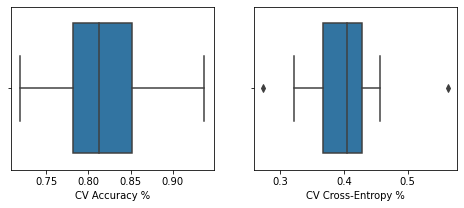

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))
sns.boxplot(acc_list, ax=axs[0])
axs[0].set_xlabel('CV Accuracy %')
sns.boxplot(cross_entropy_list, ax=axs[1])
plt.xlabel('CV Cross-Entropy %')
plt.savefig('apr5_results.jpeg', bbox_inches="tight", dpi=2000)

/home/eecs/utrerf/anaconda3/envs/trojai/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'CV Cross-Entropy %')

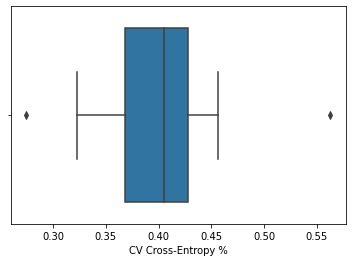

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss


num_iterations = 20
test_size = .15

task_df = min_features[min_features['task']=='SC']
sc_acc_list, sc_cross_entropy_list = [], []
for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(
        task_df[['loss']], task_df['poisoned'], test_size=test_size, random_state=i)

    clf = LogisticRegression().fit(X_train, y_train)
    sc_acc_list.append(clf.score(X_test, y_test))
    sc_cross_entropy_list.append(log_loss(y_test, clf.predict_proba(X_test)))

task_df = min_features[min_features['task']=='NER']
ner_acc_list, ner_cross_entropy_list = [], []
for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(
        task_df[['loss']], task_df['poisoned'], test_size=test_size, random_state=i)

    clf = LogisticRegression().fit(X_train, y_train)
    ner_acc_list.append(clf.score(X_test, y_test))
    ner_cross_entropy_list.append(log_loss(y_test, clf.predict_proba(X_test)))

task_df = min_features[min_features['task']=='QA']
qa_acc_list, qa_cross_entropy_list = [], []
for i in range(num_iterations):
    X_train, X_test, y_train, y_test = train_test_split(
        task_df[['loss']], task_df['poisoned'], test_size=test_size, random_state=i)

    clf = LogisticRegression().fit(X_train, y_train)
    qa_acc_list.append(clf.score(X_test, y_test))
    qa_cross_entropy_list.append(log_loss(y_test, clf.predict_proba(X_test)))

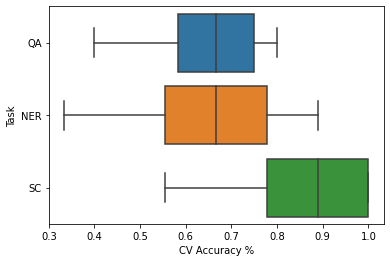

In [45]:
all_dfs = []

temp_df = pd.DataFrame([])
temp_df['accuracy'] = qa_acc_list
temp_df['task'] = 'QA'
all_dfs.append(temp_df)

temp_df = pd.DataFrame([])
temp_df['accuracy'] = ner_acc_list
temp_df['task'] = 'NER'
all_dfs.append(temp_df)

temp_df = pd.DataFrame([])
temp_df['accuracy'] = sc_acc_list
temp_df['task'] = 'SC'
all_dfs.append(temp_df)

acc_df = pd.concat(all_dfs)

sns.boxplot(data=acc_df, x='accuracy', y='task')
plt.xlabel('CV Accuracy %')
plt.ylabel('Task')
plt.savefig('CV_Accuracy.jpeg', dpi=2000)

In [35]:
acc_df

NameError: name 'acc_df' is not defined

In [8]:
x = min_features[(min_features['task']=='QA') & (min_features['poisoned']==True)].sort_values('loss')
len(x)

59

# DL

In [1]:
import torch

In [26]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [27]:
x.shape

torch.Size([12])

In [28]:
X = x.reshape((3,4))
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [29]:
torch.zeros((3,4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [7]:
torch.ones((3,4))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [8]:
torch.randn((3,4))

tensor([[-1.2500, -0.3359, -0.0237, -0.2518],
        [-0.8145,  0.3332,  0.7313,  0.8667],
        [-0.7061,  0.2141, -0.6915,  0.3111]])

In [9]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x+y,x-y,x*y,x/y,x**y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

In [13]:
X[1:]

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [14]:
A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [15]:
import os
os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # Column names
    f.write('NA,Pave,127500\n')  # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

In [16]:
import pandas as pd
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [21]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs

,NumRooms,Alley
0,NaN,Pave
1,2.0,NaN
2,4.0,NaN
3,NaN,NaN


In [22]:
 inputs = pd.get_dummies(inputs, dummy_na=True)
 inputs

,NumRooms,Alley_Pave,Alley_nan
0,NaN,1,0
1,2.0,0,1
2,4.0,0,1
3,NaN,0,1


In [23]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

(tensor([[nan, 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [nan, 0., 1.]], dtype=torch.float64),
 tensor([127500, 106000, 178100, 140000]))

In [24]:
inputs.values

array([[nan,  1.,  0.],
       [ 2.,  0.,  1.],
       [ 4.,  0.,  1.],
       [nan,  0.,  1.]])

In [33]:
X = torch.ones((3,4,5))

In [35]:
X.sum(dim=[0,1])

tensor([12., 12., 12., 12., 12.])

In [36]:
X.numel()

60

In [43]:
X.norm()

tensor(7.7460)

In [53]:
torch.sqrt(3*(X[1].norm()**2))

tensor(7.7460)